In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_excel("../data/sods_limpo.xlsx")

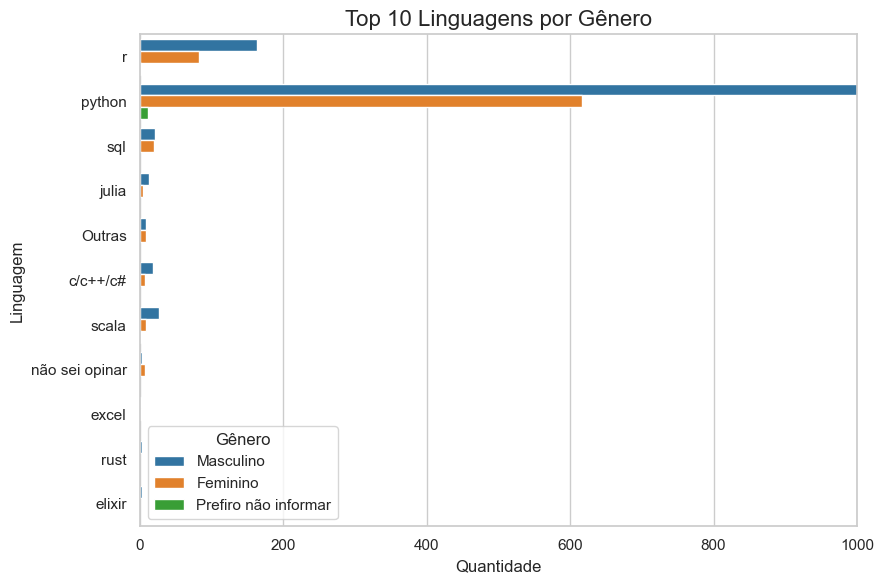

In [3]:
# ----------  Top N linguagens ----------
top_linguagens = df['linguagens_preferidas'].value_counts().nlargest(10).index
df['linguagem_top'] = df['linguagens_preferidas'].where(
    df['linguagens_preferidas'].isin(top_linguagens), other="Outras"
)

plt.figure(figsize=(9,6))
sns.set_theme(style="whitegrid")
sns.countplot(data=df, y="linguagem_top", hue="genero",palette={"Masculino":"#1f77b4","Feminino":"#ff7f0e","Prefiro não informar":"#29af25e6"}
)
plt.title("Top 10 Linguagens por Gênero", fontsize=16)
plt.xlabel("Quantidade")
plt.ylabel("Linguagem")
plt.xlim(0, 1000)  # limite ajustado
plt.legend(title="Gênero")
plt.tight_layout()
plt.show()


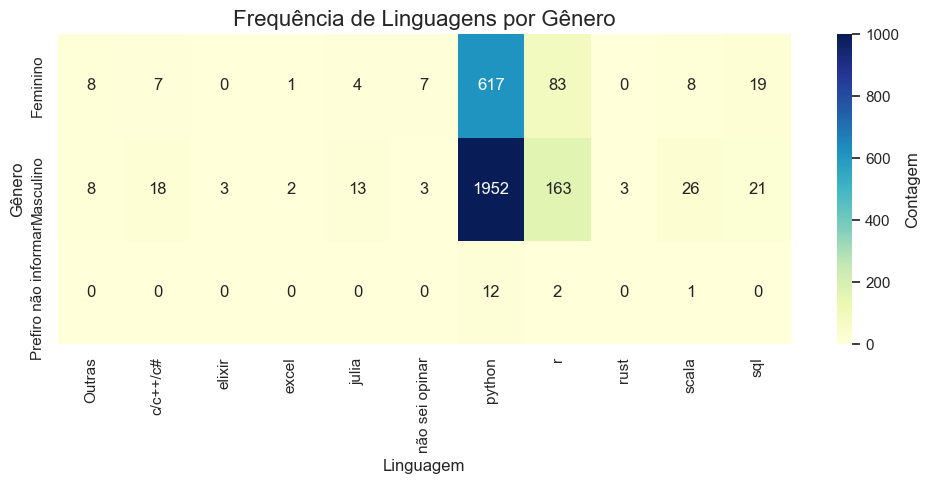

In [4]:
# ----------  Heatmap de frequência ----------
contagem = df.groupby(['genero','linguagem_top']).size().unstack(fill_value=0)

plt.figure(figsize=(10,5))
sns.heatmap(
    contagem, annot=True, fmt="d", cmap="YlGnBu",
    vmin=0, vmax=1000, cbar_kws={'label': 'Contagem'}
)
plt.title("Frequência de Linguagens por Gênero", fontsize=16)
plt.ylabel("Gênero")
plt.xlabel("Linguagem")
plt.tight_layout()
plt.show()

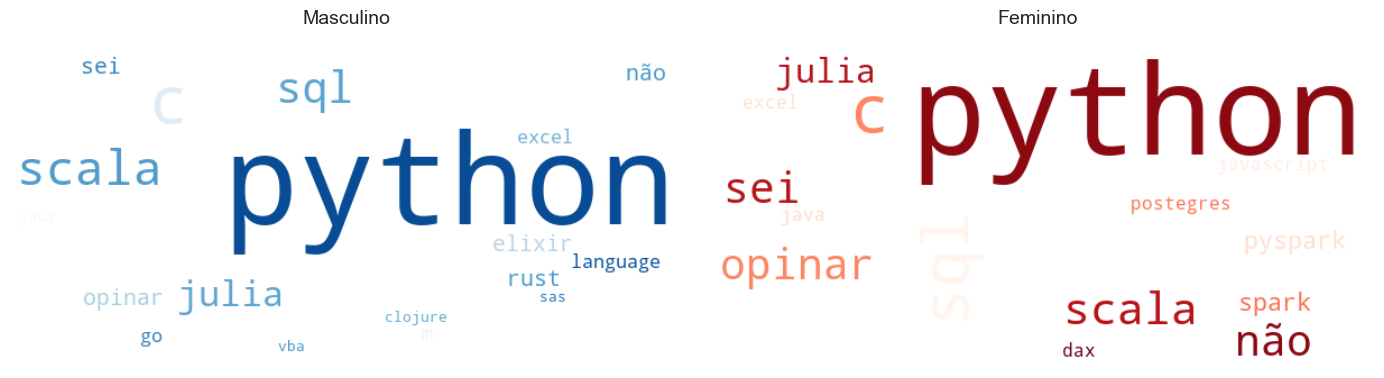

In [5]:
# ----------  Wordclouds lado a lado ----------
texto_m = " ".join(df[df['genero']=="Masculino"]['linguagens_preferidas'].dropna().astype(str))
wordcloud_m = WordCloud(
    width=600, height=300, background_color="white",
    colormap="Blues", collocations=False
).generate(texto_m)

texto_f = " ".join(df[df['genero']=="Feminino"]['linguagens_preferidas'].dropna().astype(str))
wordcloud_f = WordCloud(
    width=600, height=300, background_color="white",
    colormap="Reds", collocations=False
).generate(texto_f)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_m, interpolation="bilinear")
plt.axis("off")
plt.title("Masculino", fontsize=14)

plt.subplot(1,2,2)
plt.imshow(wordcloud_f, interpolation="bilinear")
plt.axis("off")
plt.title("Feminino", fontsize=14)

plt.tight_layout()
plt.show()